In [1]:
#!pip install tensorflow

In [2]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout



In [3]:
# haciendo que numpy represente correctamente los numeros
np.set_printoptions(suppress=True, formatter={'float_kind': '{:.6f}'.format})
np.set_printoptions(threshold=np.inf)

In [4]:
# cargando la data

In [5]:
data = np.load("./data/combined_training_data.npz")

# Acceder a los arrays almacenados
X_loaded = data["X"]
y_loaded = data["y"]

print("Forma de X cargado:", X_loaded.shape)
print("Forma de y cargado:", y_loaded.shape)



Forma de X cargado: (2050, 10, 7)
Forma de y cargado: (2050, 7)


In [6]:
X_loaded

array([[[0.47905701, 0.04672636, 0.28570947, 0.        , 0.        ,
         0.12266951, 0.06583765],
        [0.52114283, 0.        , 0.38185383, 0.        , 0.        ,
         0.06814926, 0.02885409],
        [0.59920663, 0.0906472 , 0.31014617, 0.        , 0.        ,
         0.        , 0.        ],
        [0.5555181 , 0.10028106, 0.34420085, 0.        , 0.        ,
         0.        , 0.        ],
        [0.61567193, 0.03380078, 0.3505273 , 0.        , 0.        ,
         0.        , 0.        ],
        [0.58570597, 0.11739262, 0.2952667 , 0.        , 0.        ,
         0.        , 0.00163471],
        [0.44027589, 0.17024736, 0.3874948 , 0.        , 0.        ,
         0.        , 0.00198194],
        [0.47346749, 0.17119667, 0.31862278, 0.        , 0.        ,
         0.03671306, 0.        ],
        [0.44528994, 0.16698816, 0.3594094 , 0.        , 0.        ,
         0.0283125 , 0.        ],
        [0.56081346, 0.11901852, 0.30601504, 0.        , 0.        ,
    

In [7]:

from tensorflow.keras.activations import swish
# es muy dificil que prediga un peso cercano a 0 por lo que voy a intentar funciones como la swish aparte de la lineal



# Definir el modelo
def create_lstm_model(input_shape):
    model = Sequential()
    
    # Primera capa LSTM (debe especificar input_shape)
    model.add(LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(Dropout(rate=0.1)) #
    
    
    # Capas LSTM intermedias
    #for _ in range(5):  # 5 capas intermedias
    #    model.add(LSTM(64, return_sequences=True))
    
    model.add(LSTM(64, return_sequences=True))
    model.add(Dropout(rate=0.1)) #
    
    # Última capa LSTM (sin return_sequences)
    model.add(LSTM(32))
    
    # Capas densas (puedes ajustar los tamaños según tus necesidades)
    model.add(Dense(64, activation='relu'))# doblo a 64 en v4
    model.add(Dropout(rate=0.1)) #
    model.add(Dense(32, activation='relu'))
    #model.add(Dropout(rate=0.15)) #
    
    
    model.add(Dense(16, activation='relu'))# comentando esta el val es menor que el de train
    
    # Capa de salida (7 neuronas, una para cada valor)
    #model.add(Dense(7, activation='linear'))  # 7 valores predichos
    model.add(Dense(7, activation='swish'))  # 7 valores predichos

    return model




In [8]:

# Crear el modelo
input_shape = (10, X_loaded.shape[2])  # 10 pasos por secuencia, n_features
model = create_lstm_model(input_shape)

# Compilar el modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Resumen del modelo
model.summary()




c:\Users\user\miniconda3\envs\idm\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 64)         │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 10, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           119 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,711 (268.40 KB)

 Trainable params: 68,711 (268.40 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:

# cambiando los pasos de aprendizaje
from tensorflow.keras.callbacks import ReduceLROnPlateau
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=9e-7)

# Entrenar el modelo
history = model.fit(
    X_loaded,    # Datos de entrada (debe tener forma (n_samples, 10, n_features))
    y_loaded,    # Etiquetas (debe tener forma (n_samples, 1) para regresión)
    epochs=64,     # Número de épocas (puedes ajustar según el tamaño de los datos)
    batch_size=32, # 64*32 es la cantidad de datos de entrenamiento que hay, creo que ams que eso haria overfitting
    validation_split=0.2,  # Usar el 20% de los datos para validación
    verbose=1,      # Mostrar progreso del entrenamiento
    callbacks=[lr_scheduler]
)


Epoch 1/64
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0557 - mae: 0.1471 - val_loss: 0.0366 - val_mae: 0.1452 - learning_rate: 0.0010
Epoch 2/64
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0305 - mae: 0.1328 - val_loss: 0.0246 - val_mae: 0.1170 - learning_rate: 0.0010
Epoch 3/64
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0187 - mae: 0.1040 - val_loss: 0.0132 - val_mae: 0.0852 - learning_rate: 0.0010
Epoch 4/64
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0121 - mae: 0.0817 - val_loss: 0.0117 - val_mae: 0.0788 - learning_rate: 0.0010
Epoch 5/64
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0109 - mae: 0.0752 - val_loss: 0.0111 - val_mae: 0.0768 - learning_rate: 0.0010
Epoch 6/64
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0097 - mae: 0.0702 - val_loss: 0.0106 - val_mae: 0.0727 - learning_rate: 0.0010
Epoch 7/64
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0090 - mae: 0.0676 - val_loss: 0.0102 - val_mae: 0.0735 - learning_rate: 0.0010
Epoch 8/64
52/52 ━

In [10]:

#  mish
# val_loss: 0.0031 - val_mae: 0.0384 swish
# val_loss: 0.0031 - val_mae: 0.0399
# val_loss: 0.0032 - val_mae: 0.0401



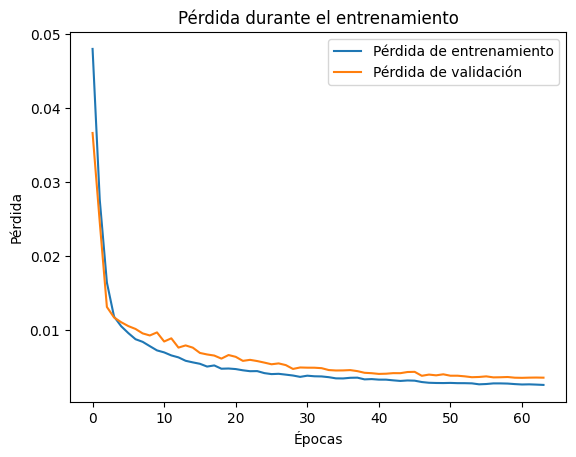

In [11]:

# Graficar la pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida durante el entrenamiento')
plt.show()
#v4

In [12]:
# probando el modelo en datos out of sample

In [13]:


# Cargar datos out-of-sample
data = np.load("./data/out_of_sample_data.npz")

# Acceder a los arrays almacenados
X_sample = data["X"]  # Debe tener forma (n_samples, 10, n_features)
y_sample = data["y"]  # Debe tener forma (n_samples, 7)

print("Forma de X cargado:", X_sample.shape)
print("Forma de y cargado:", y_sample.shape)

# Evaluar el modelo en datos de prueba
loss, mae = model.evaluate(X_sample, y_sample, verbose=1)
print("Pérdida en datos de prueba (MSE):", loss)
print("Error absoluto medio (MAE):", mae)

# Hacer predicciones
y_pred = model.predict(X_sample)




Forma de X cargado: (41, 10, 7)
Forma de y cargado: (41, 7)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0026 - mae: 0.0343
Pérdida en datos de prueba (MSE): 0.00250581419095397
Error absoluto medio (MAE): 0.03364533931016922
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 255ms/step


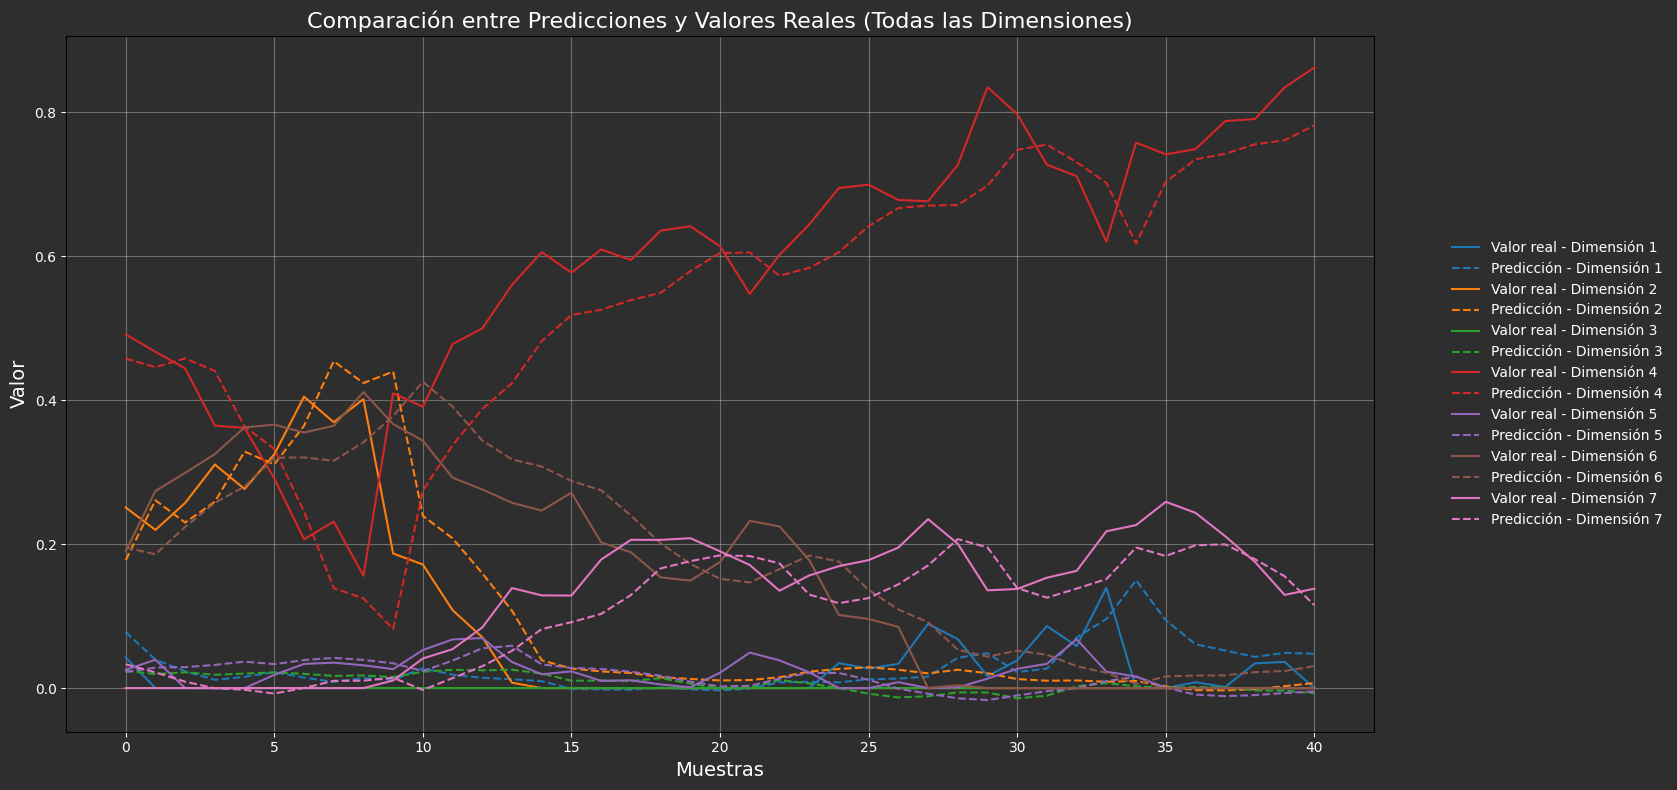

In [14]:

# Configurar un mapa de colores
colors = plt.cm.tab10.colors  # Usamos una paleta de colores de Matplotlib

# Visualizar todas las dimensiones en un solo gráfico
plt.figure(figsize=(20, 8))

for dim in range(y_sample.shape[1]):  # Iterar por las 7 dimensiones
    color = colors[dim % len(colors)]  # Elegir un color del mapa
    plt.plot(y_sample[:, dim], color=color, label=f"Valor real - Dimensión {dim+1}")
    plt.plot(y_pred[:, dim], color=color, linestyle='--', label=f"Predicción - Dimensión {dim+1}")

# Personalización del gráfico
plt.title("Comparación entre Predicciones y Valores Reales (Todas las Dimensiones)", fontsize=16, color='white')  # Título en blanco
plt.xlabel("Muestras", fontsize=14, color='white')  # Etiqueta del eje X en blanco
plt.ylabel("Valor", fontsize=14, color='white')  # Etiqueta del eje Y en blanco

# Configurar las etiquetas de los ejes en blanco
plt.tick_params(colors='white')  # Cambiar color de los ticks y las etiquetas de los ejes

# Leyenda fuera del gráfico
plt.legend(
    loc='center left',            # Posicionar al centro vertical, lado izquierdo del anchor
    bbox_to_anchor=(1.05, 0.5),  # Ajustar la posición fuera del gráfico (derecha)
    frameon=False,               # Sin marco
    labelcolor='white'           # Texto blanco
)

# Cuadrícula con líneas más claras
plt.grid(alpha=0.3, color='white')

# Estilo de fondo oscuro
plt.gca().set_facecolor('#2e2e2e')  # Fondo del área del gráfico
plt.gcf().set_facecolor('#2e2e2e')  # Fondo de la figura completa

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Ajustar márgenes para dar espacio a la leyenda

# Mostrar la gráfica
plt.show()




In [15]:
# guardando el modelo